<a href="https://colab.research.google.com/github/dibesmab-cyber/d/blob/main/Untitlead1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install pandas matplotlib seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/content/500veri.csv")

In [ ]:
import pandas as pd

# Dosyayƒ± farklƒ± bir encoding ile oku (√∂r: ISO-8859-9 ya da Windows-1254 olabilir)
df = pd.read_csv("/content/ABC.csv", encoding="Windows-1254")  # Kodlamayƒ± gerekirse deƒüi≈ütir

# UTF-8 olarak kaydet
df.to_csv("dson.csv", index=False, encoding="utf-8")

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 118: character maps to <undefined>

In [ ]:
import pandas as pd
import chardet

# 1. Dosya yolu
file_path = "/content/ABC.csv"

# 2. Encoding tespiti
with open(file_path, "rb") as f:
    result = chardet.detect(f.read())
encoding = result["encoding"]
print(f"Tespit edilen encoding: {encoding}")

# 3. Dosyayƒ± doƒüru encoding ile oku
df = pd.read_csv(file_path, encoding=encoding, on_bad_lines='skip')

# 4. ƒ∞lk 5 satƒ±rƒ± g√∂ster
print(df.head())

# 5. ƒ∞stersen UTF-8 olarak kaydet
df.to_csv("/content/denew.csv", index=False, encoding="utf-8")
print("Dosya UTF-8 olarak kaydedildi: denemeveri_utf8.csv")

Tespit edilen encoding: Windows-1254


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 118: character maps to <undefined>

In [ ]:
import pandas as pd
import re

df = pd.read_csv("/content/Kitap3 - Kitap3.csv")

def duration_to_seconds(duration):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds

df["Video_S√ºresi_Saniye"] = df["Video S√ºresi"].apply(duration_to_seconds)


df.to_csv("diyanet_yorumlar_guncel.csv", index=False) #yeni csvye kaydet

print(df[["Video S√ºresi", "Video_S√ºresi_Saniye"]].head())


  Video S√ºresi  Video_S√ºresi_Saniye
0        PT26S                   26
1        PT26S                   26
2        PT26S                   26
3        PT26S                   26
4        PT26S                   26


In [ ]:
df = pd.read_csv("/content/ABC.csv")

In [23]:

print("Tekrarlayan satƒ±r sayƒ±sƒ±", df.duplicated().sum())


Tekrarlayan satƒ±r sayƒ±sƒ± 0


In [24]:
# veriyle ilgili temel incelemeler
#
print("üîπ Veri Boyutu:", df.shape)
print("\nüîπ ƒ∞lk 5 Satƒ±r:")
print(df.head()) #direkt df.head(5) de olur genel yapƒ±yƒ± g√∂rmek/kontrol etmek i√ßin

print("\nüîπ Veri Hakkƒ±nda Bilgi:")
print(df.info())

print("\nüîπ Eksik Deƒüerler:")
print(df.isnull().sum())

print("\nüîπ Temel ƒ∞statistikler:")
print(df.describe()) #sayƒ±sal sutunlar icin
df.describe(include='object') #kategorik sutunlar icin

üîπ Veri Boyutu: (516, 3)

üîπ ƒ∞lk 5 Satƒ±r:
   Duygu         Yorum Yapan  \
0      1  @sezginsenucar9897   
1      1        @alieralp798   
2      1  @ufukdikilitas9297   
3      1             @mdnmzz   
4      1         @odin_fatih   

                                               Yorum  
0  DERHAL  GEREKEN YAPILSIN YA   YETER ARTIK √úLKE...  
1  Ba≈ülayan soru≈üturma Ali Erba≈ü tan ba≈ülatƒ±lmasƒ±...  
2            Bo≈üuna uƒüra≈ümayƒ±n, onlara bi ≈üey olmaz!  
3                                 Akharamiler istifa  
4  Vergiden ka√ßƒ±nmadƒ±r, vergi ka√ßƒ±rma deƒüil nasƒ±l...  

üîπ Veri Hakkƒ±nda Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Duygu        516 non-null    int64 
 1   Yorum Yapan  516 non-null    object
 2   Yorum        516 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.2+ KB
None

üîπ Eksik Deƒüe

Yorum Yapan               Yorum
count              516                 516
unique             489                 514
top     @ilkbahar9_9_9  Diyanet kapatƒ±lsƒ±n
freq                 4                   2

In [25]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} benzersiz deƒüer")

Duygu: 3 benzersiz deƒüer
Yorum Yapan: 489 benzersiz deƒüer
Yorum: 514 benzersiz deƒüer


In [26]:
numeric_cols = [col for col in df.columns if df[col].dtype == 'int']
for col in numeric_cols:
    print(f"\n{col} daƒüƒ±lƒ±mƒ±:")
    print(df[col].value_counts().head(10))


Duygu daƒüƒ±lƒ±mƒ±:
Duygu
1    269
3    207
2     40
Name: count, dtype: int64


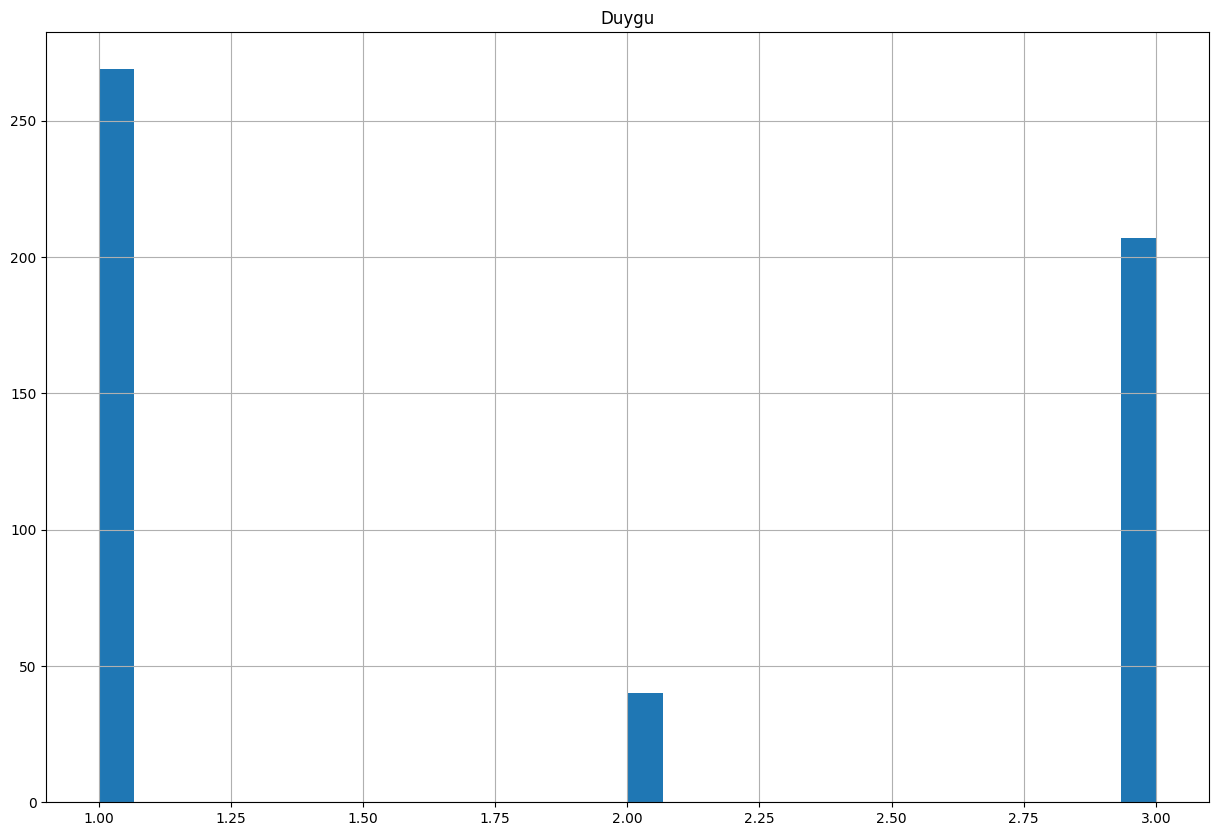

In [27]:

df.hist(figsize=(15, 10), bins=30)
plt.show()

In [28]:
df['Beƒüeni Sayƒ±sƒ±'].hist(bins=15, figsize=(10,6))
plt.xlabel("Beƒüeni Sayƒ±sƒ±")
plt.ylabel("Video Sayƒ±sƒ±")
plt.title("video-beƒüeni sayƒ±sƒ± daƒüƒ±lƒ±mƒ±")
plt.show()

KeyError: 'Beƒüeni Sayƒ±sƒ±'

<Axes: >

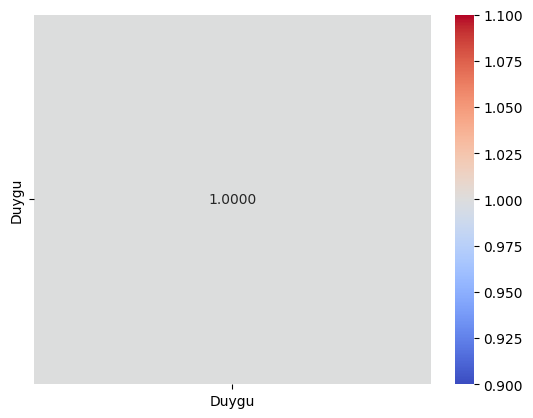

In [ ]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,           #√ºst√ºne sayƒ±sal deger yazmak
    fmt=".4f",            # ondalƒ±k
    cmap="coolwarm",
    cbar=True             # Saƒüdaki renk skalasƒ±
)

In [ ]:
# Numerik kolonlarƒ± se√ß

# Skewness ve Kurtosis hesapla
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

#sonuclar
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print("üìä Skewness ve Kurtosis:")
print(skew_kurt_df)

#skewness √ßarpƒ±klƒ±k 0a yakƒ±n normal, pozitif saƒü √ßarpƒ±k, negatif sol √ßarpƒ±k
#kurtosis basƒ±klƒ±k 0 normale yakƒ±n, >0 sivri, <0 basƒ±k daƒüƒ±lƒ±m

üìä Skewness ve Kurtosis:
                     Skewness   Kurtosis
Duygu                0.000000  -1.525862
Beƒüeni Sayƒ±sƒ±        1.770802   1.533715
Yanƒ±t Sayƒ±sƒ±         7.141368  53.246283
G√∂r√ºnt√ºlenme Sayƒ±sƒ±  2.534781   7.755945
Video_S√ºresi_Saniye  3.912678  20.162454


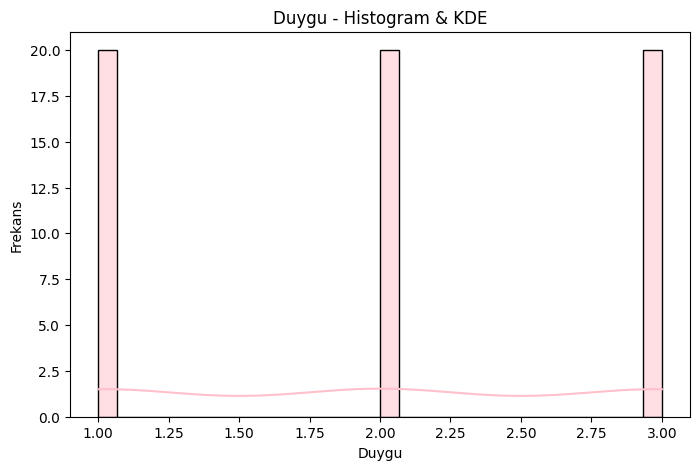

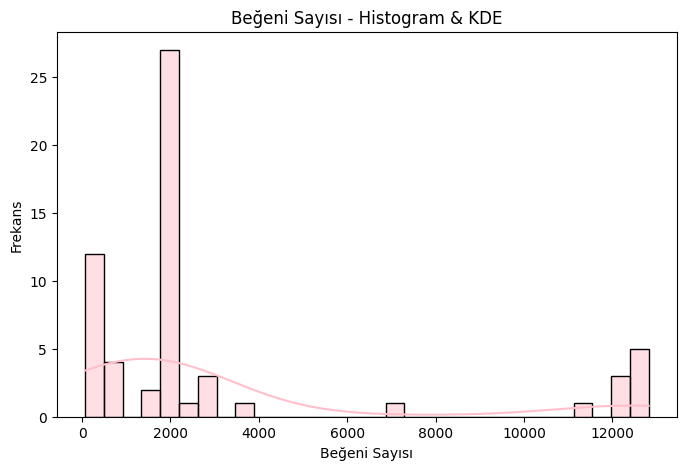

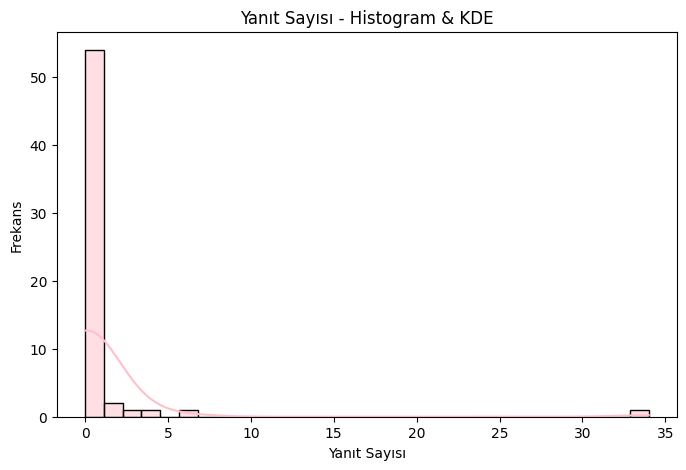

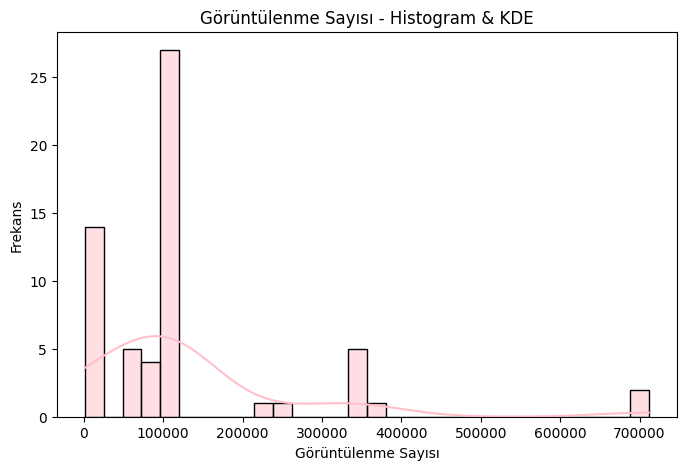

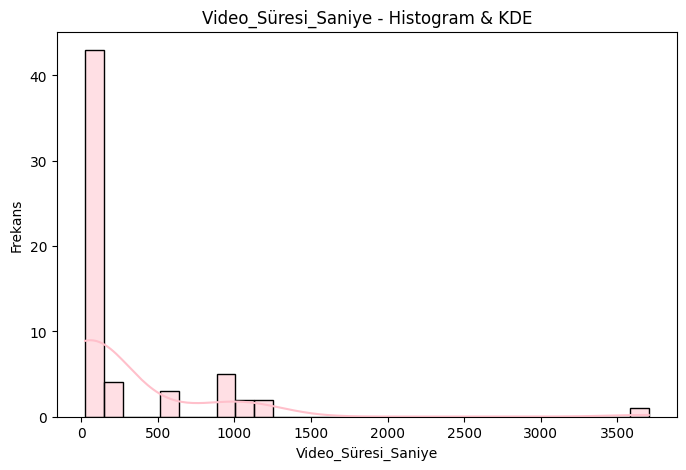

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color="pink", bins=30)  # kernel density estimate
    plt.title(f"{col} - Histogram & KDE")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanƒ±n adƒ±nƒ± buraya yaz (√∂r: "yorumlar.csv")
df = pd.read_csv("/content/diyanet_yorumlar_guncel.csv")

# Sadece gerekli s√ºtunlarƒ± al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eƒüitim/test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vekt√∂rle≈ütirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonu√ßlar
print("Sƒ±nƒ±flandƒ±rma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karma≈üƒ±klƒ±k Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sƒ±nƒ±flandƒ±rma Raporu:

              precision    recall  f1-score   support

     Negatif       1.00      0.25      0.40         4
        Notr       0.22      1.00      0.36         2
     Pozitif       1.00      0.33      0.50         6

    accuracy                           0.42        12
   macro avg       0.74      0.53      0.42        12
weighted avg       0.87      0.42      0.44        12

Karma≈üƒ±klƒ±k Matrisi:

[[1 3 0]
 [0 2 0]
 [0 4 2]]


In [29]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# ƒ∞lk kez √ßalƒ±≈ütƒ±rƒ±yorsan uncomment et:
nltk.download('stopwords')

turkish_stopwords = set(stopwords.words('turkish'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    # K√º√ß√ºk harfe √ßevir
    text = text.lower()

    # Emoji ve √∂zel karakterleri kaldƒ±r
    text = re.sub(r'[^\w\s√ßƒüƒ±√∂≈ü√º]', ' ', text)

    # Sayƒ±larƒ± kaldƒ±r
    text = re.sub(r'\d+', '', text)

    # Noktalama i≈üaretlerini kaldƒ±r
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Stopwords temizleme
    text = ' '.join([word for word in text.split() if word not in turkish_stopwords])

    # Fazla bo≈üluklarƒ± d√ºzenleme
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# CSV'yi oku
df = pd.read_csv("/content/500veri.csv")

# Temizlenmi≈ü yorumlarƒ± yeni bir s√ºtuna ekle
df["Temiz_Yorum"] = df["Yorum"].apply(clean_text)

# Aynƒ± dosyaya (√ºzerine yazarak) kaydet
df.to_csv("veriler_temiz.csv", index=False)

print("‚úÖ Temizlenmi≈ü yorumlar 'veriler_temiz.csv' dosyasƒ±na kaydedildi!")


‚úÖ Temizlenmi≈ü yorumlar 'veriler_temiz.csv' dosyasƒ±na kaydedildi!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanƒ±n adƒ±nƒ± buraya yaz (√∂r: "yorumlar.csv")
df = pd.read_csv("/content/veriler_temiz.csv")

# Sadece gerekli s√ºtunlarƒ± al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eƒüitim/test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vekt√∂rle≈ütirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonu√ßlar
print("Sƒ±nƒ±flandƒ±rma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karma≈üƒ±klƒ±k Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sƒ±nƒ±flandƒ±rma Raporu:

              precision    recall  f1-score   support

     Negatif       0.78      0.93      0.85        58
        Notr       0.00      0.00      0.00         8
     Pozitif       0.89      0.82      0.85        38

    accuracy                           0.82       104
   macro avg       0.56      0.58      0.57       104
weighted avg       0.76      0.82      0.78       104

Karma≈üƒ±klƒ±k Matrisi:

[[54  0  4]
 [ 8  0  0]
 [ 7  0 31]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Gerekli k√ºt√ºphaneler
!pip install nlpaug transformers sentencepiece pandas

import pandas as pd
import nlpaug.augmenter.word as naw

# 1Ô∏è‚É£ CSV dosyasƒ±nƒ± oku
df = pd.read_csv("/content/veriler_temiz.csv")  # Dosya adƒ±nƒ± kendine g√∂re deƒüi≈ütir

# 2Ô∏è‚É£ N√∂tr sƒ±nƒ±fƒ± ayƒ±r (Duygu = 2)
neutral_df = df[df['Duygu'] == 2]
neutral_texts = neutral_df['Yorum'].tolist()

# 3Ô∏è‚É£ Augmentation hazƒ±rlƒ±ƒüƒ± (contextual word embeddings)
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-multilingual-cased',  # T√ºrk√ße destekli
    action="substitute"
)

# 4Ô∏è‚É£ Augmentation uygula
augmented_texts = []
for text in neutral_texts:
    augmented = aug.augment(text, n=3)  # Her n√∂tr c√ºmleden 3 yeni varyasyon
    augmented_texts.extend(augmented)

# 5Ô∏è‚É£ Augmented veriyi DataFrame olarak hazƒ±rla
aug_df = pd.DataFrame({
    "Duygu": [2]*len(augmented_texts),
    "Yorum Yapan": ["Augmented"]*len(augmented_texts),  # Yeni veri i√ßin placeholder
    "Yorum": augmented_texts
})

# 6Ô∏è‚É£ Orijinal veri ile birle≈ütir
new_df = pd.concat([df, aug_df], ignore_index=True)

# 7Ô∏è‚É£ Yeni CSV'yi kaydet
new_df.to_csv("dataset_augmented.csv", index=False, encoding="utf-8-sig")

print("Augmentation tamamlandƒ±! Yeni CSV 'dataset_augmented.csv' olarak kaydedildi.")
print(f"Orijinal n√∂tr c√ºmle sayƒ±sƒ±: {len(neutral_texts)}")
print(f"Augmented n√∂tr c√ºmle sayƒ±sƒ±: {len(augmented_texts)}")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.5/410.5 kB 9.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Augmentation tamamlandƒ±! Yeni CSV 'dataset_augmented.csv' olarak kaydedildi.
Orijinal n√∂tr c√ºmle sayƒ±sƒ±: 40
Augmented n√∂tr c√ºmle sayƒ±sƒ±: 120


In [34]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# ƒ∞lk kez √ßalƒ±≈ütƒ±rƒ±yorsan uncomment et:
nltk.download('stopwords')

turkish_stopwords = set(stopwords.words('turkish'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    # K√º√ß√ºk harfe √ßevir
    text = text.lower()

    # Emoji ve √∂zel karakterleri kaldƒ±r
    text = re.sub(r'[^\w\s√ßƒüƒ±√∂≈ü√º]', ' ', text)

    # Sayƒ±larƒ± kaldƒ±r
    text = re.sub(r'\d+', '', text)

    # Noktalama i≈üaretlerini kaldƒ±r
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Stopwords temizleme
    text = ' '.join([word for word in text.split() if word not in turkish_stopwords])

    # Fazla bo≈üluklarƒ± d√ºzenleme
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# CSV'yi oku
df = pd.read_csv("/content/dataset_augmented.csv")

# Temizlenmi≈ü yorumlarƒ± yeni bir s√ºtuna ekle
df["Temiz_Yorum"] = df["Yorum"].apply(clean_text)

# Aynƒ± dosyaya (√ºzerine yazarak) kaydet
df.to_csv("augmented500.csv", index=False)

print("‚úÖ Temizlenmi≈ü yorumlar 'augmented500' dosyasƒ±na kaydedildi!")


‚úÖ Temizlenmi≈ü yorumlar 'augmented500' dosyasƒ±na kaydedildi!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# CSV'den veriyi oku
# kendi dosyanƒ±n adƒ±nƒ± buraya yaz (√∂r: "yorumlar.csv")
df = pd.read_csv("/content/augmented500.csv")

# Sadece gerekli s√ºtunlarƒ± al
df = df[['Yorum', 'Duygu']] # buraya temiz yorum sutunu gelecek

# Eƒüitim/test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(
    df['Yorum'], df['Duygu'], test_size=0.2, random_state=42
)

# TF-IDF vekt√∂rle≈ütirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression modeli
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)

# Sonu√ßlar
print("Sƒ±nƒ±flandƒ±rma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Notr", "Pozitif"]))

print("Karma≈üƒ±klƒ±k Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Sƒ±nƒ±flandƒ±rma Raporu:

              precision    recall  f1-score   support

     Negatif       0.70      0.94      0.80        49
        Notr       0.89      0.65      0.75        37
     Pozitif       0.91      0.76      0.83        42

    accuracy                           0.80       128
   macro avg       0.83      0.78      0.79       128
weighted avg       0.82      0.80      0.80       128

Karma≈üƒ±klƒ±k Matrisi:

[[46  2  1]
 [11 24  2]
 [ 9  1 32]]
